# Part II - Flight Delays and Operations Analysis
## by Leen Almudaifer

## Investigation Overview


> This presentation summarizes key findings from the exploratory analysis of U.S. flight operations data [T_ONTIME_REPORTING.csv](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr). The goal is to identify patterns in delays, cancellations, and diversions, and to understand how operational factors such as departure hour, day of the week, and flight distance influence flight outcomes.

**Key Insights:**

> Flights departing before 4 AM are more prone to delays.

> Longer flights are more likely to arrive late, while flights under ~3,000 miles typically arrive on time.

> Cancellations are rare, but their distribution aligns with periods of higher delays, particularly on Thursdays and Fridays.


## Dataset Overview and Executive Summary

**The dataset includes 539,747 flight records with variables covering:**

> Flight schedules (dates, times, and distances)

> Performance measures (arrival and departure delays)

> Operational outcomes (cancellations, diversions)

**This presentation focuses on three themes supported by the visualizations:**

> Departure time and arrival delays

> Cancellations across the week

> Impact of distance and departure time on punctuality

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("processed_flights.csv")

##  Cancelled vs Not Cancelled by Day of Week
 

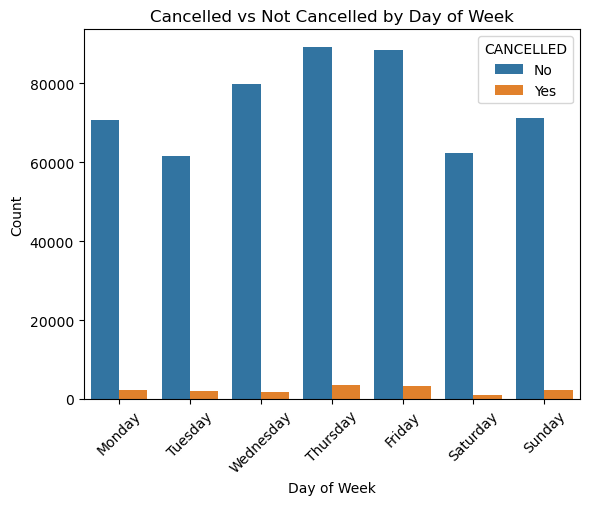

In [3]:
# Group by day of week and CANCELLED
cancel_by_day = df.groupby(['DAY_OF_WEEK','CANCELLED']).size().reset_index(name='counts')
cancel_by_day['CANCELLED'] = cancel_by_day['CANCELLED'].replace({0.0: 'No', 1.0: 'Yes'})
# Order days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(
    x="DAY_OF_WEEK",
    y="counts",
    hue="CANCELLED",
    data=cancel_by_day,
    order=day_order
)
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title("Cancelled vs Not Cancelled by Day of Week")
plt.xticks(rotation=45)
plt.show()

#### Analysis of flight cancellations across the week reveals a clear operational pattern. Peak travel days—Thursdays and Fridays—experience the highest number of flights and the greatest number of cancellations, suggesting that operational pressures during busy days contribute to service disruptions. Despite this, the vast majority of flights operate as scheduled, highlighting overall reliability. Lower cancellation rates on Saturdays and Tuesdays indicate opportunities for airlines to schedule maintenance or reallocate resources on these lower-risk days to optimize operational efficiency.
`Key Insight:` 
> Flight cancellations are concentrated on peak operational days, but overall schedule reliability remains strong, underscoring the importance of considering day-of-week effects in operational planning.

## Average Early and Late Arrival Delay by Departure Hour

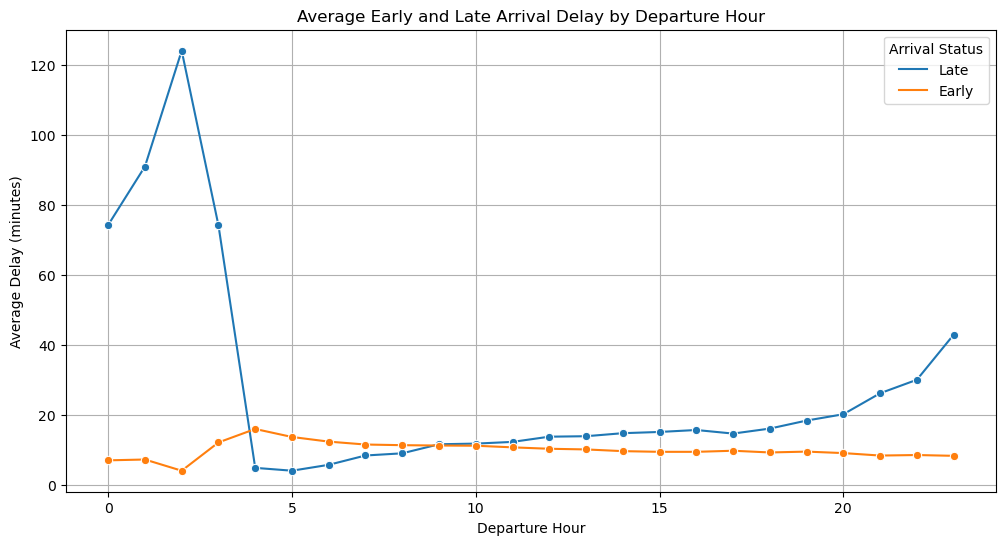

In [4]:
# Use the columns we already created: ARR_Late and ARR_Early
# ARR_Late is 0 if not late, ARR_Early is 0 if not early

# Melt the data so we can plot both Early and Late as a single hue
agg_delay = df.groupby('DEP_HOUR')[['ARR_Late','ARR_Early']].mean().reset_index()
agg_delay_melt = agg_delay.melt(id_vars='DEP_HOUR', value_vars=['ARR_Late','ARR_Early'],
                                var_name='ARR_Stat', value_name='Average_Delay')

# Rename for readability
agg_delay_melt['ARR_Stat'] = agg_delay_melt['ARR_Stat'].replace({'ARR_Late':'Late', 'ARR_Early':'Early'})

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=agg_delay_melt,
    x='DEP_HOUR',
    y='Average_Delay',
    hue='ARR_Stat',
    marker='o'
)
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Early and Late Arrival Delay by Departure Hour")
plt.grid(True)
plt.legend(title="Arrival Status")
plt.show()

#### Departure hour significantly influences arrival punctuality. Flights departing before 4 AM, particularly around 2 AM, exhibit the highest average late arrival delays, likely due to limited staffing and night-time operational constraints. Departures between 4–8 AM show a higher probability of early arrivals, benefiting from lighter air traffic and favorable operational conditions. Evening departures after 8 PM show a gradual increase in delays, suggesting the accumulation of earlier delays or congestion effects.

`Key Insight:`
> Airlines can mitigate delay risks by strategically adjusting staffing, ground operations, and buffer times for very early and late departures.

## Departure Hour vs Distance, by Arrival Status

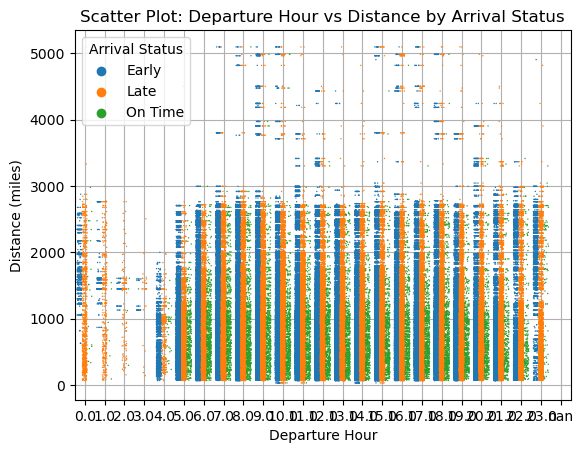

In [5]:
# Create Arrival Status column
df['ARR_Status'] = df['ARR_DELAY'].apply(
    lambda x: 'Late' if x > 0 else ('Early' if x < 0 else 'On Time')
)

# Scatter plot: Departure Hour vs Distance, colored by Arrival Status
plt.figure()
sns.stripplot(
    data=df,
    x="DEP_HOUR",
    y="DISTANCE",
    hue="ARR_Status",
    dodge=True,
    jitter=0.35,
    size=1
)

plt.title("Scatter Plot: Departure Hour vs Distance by Arrival Status")
plt.xlabel("Departure Hour")
plt.ylabel("Distance (miles)")
plt.legend(title="Arrival Status")
plt.grid(True)
plt.show()

#### Flight distance and departure timing jointly impact arrival reliability. Shorter flights under approximately 3,000 miles, especially those departing after 4 AM, are more likely to arrive early, reflecting predictable routing and built-in buffer times. Longer flights have a higher likelihood of late arrivals, consistent with cumulative operational factors such as air traffic, weather, and scheduling delays. Notably, early departures before 4 AM tend to be late even for shorter distances, indicating challenges in night-time operations, including staffing limitations and airspace management.

`Key Insight:`
> Both departure hour and flight distance are critical for predicting punctuality. Airlines could optimize scheduling and resource allocation by considering these factors together to improve on-time performance.